In [ ]:
import pandas as pd

df = pd.read_parquet("/content/strava_activities_filtered.parquet")
df.head()

,activity_start_date_local,activity_comment_count,activity_kudos_count,activity_distance,activity_name,activity_total_elevation_gain,activity_average_speed,activity_max_speed,activity_elapsed_time,activity_type,activity_max_heartrate,activity_average_heartrate,activity_location_country,activity_average_cadence,activity_suffer_score,activity_description
0,2025-02-15T17:39:15Z,0,0,1448.8,Afternoon Walk,7.1,0.753,6.16,3132,Walk,NaN,NaN,None,NaN,NaN,None
1,2024-06-07T05:41:14Z,0,0,16298.2,Morning Run,70.1,3.076,7.66,5777,Run,162.0,141.0,Singapore,79.2,NaN,None
2,2023-10-28T07:24:11Z,0,0,15377.2,Morning Run,122.4,3.075,7.66,5237,Run,164.0,145.4,Singapore,75.8,88.0,None
3,2023-11-19T22:29:49Z,0,0,0.0,Stretching,0.0,0.000,0.00,1114,Workout,129.0,79.2,Singapore,NaN,1.0,None
4,2024-06-06T06:40:15Z,0,0,8004.7,Morning Run,11.1,3.042,7.48,2902,Run,157.0,135.7,Singapore,78.7,NaN,None


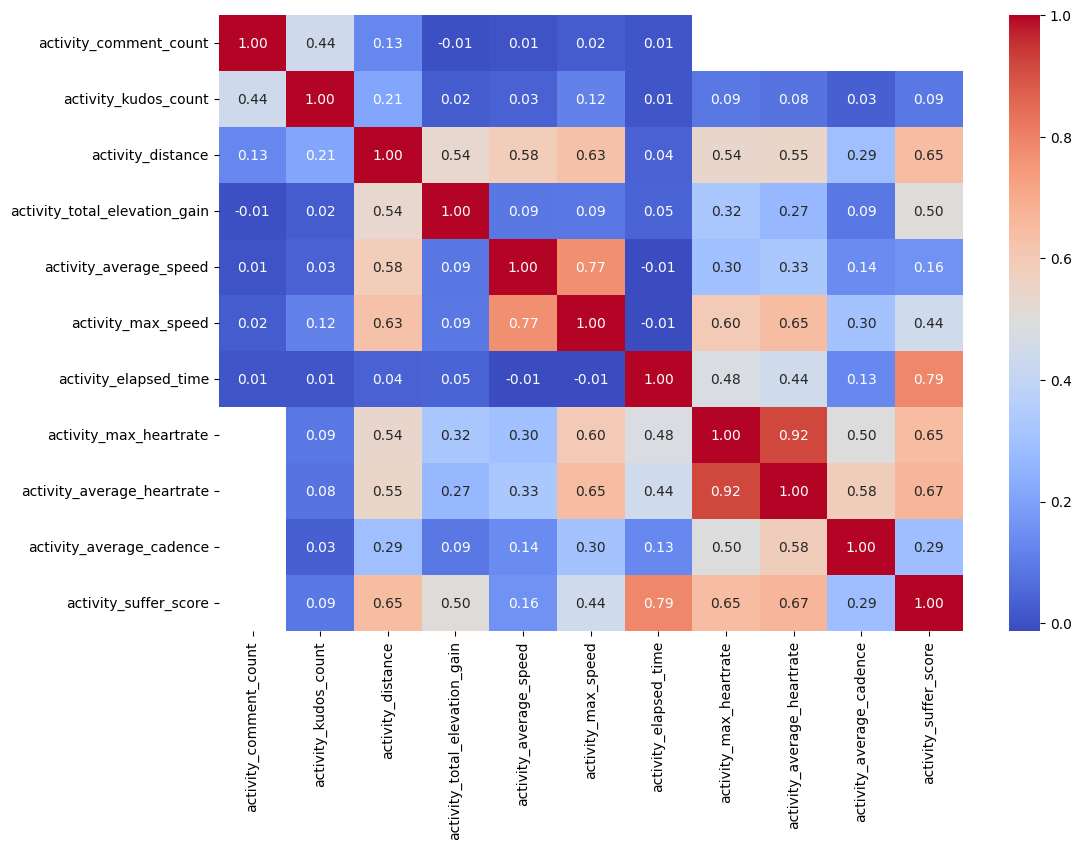

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

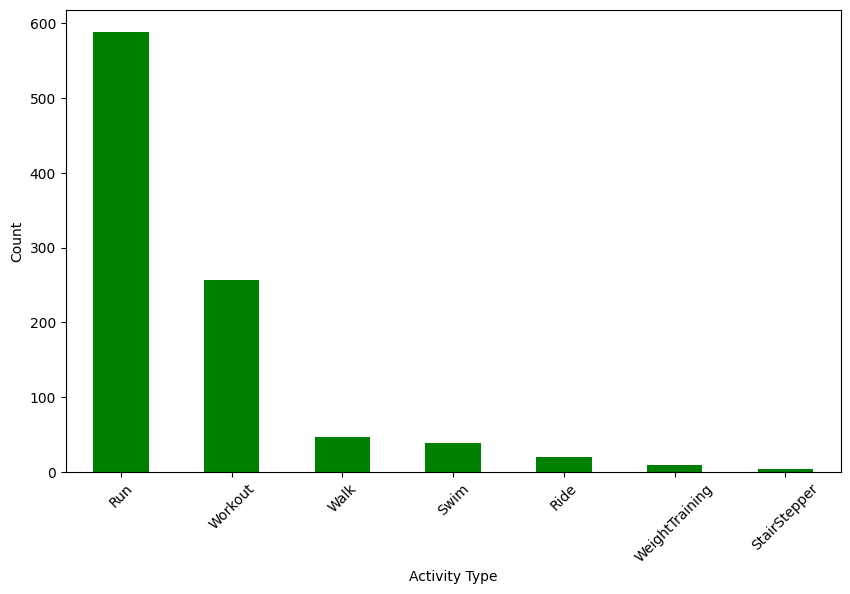

In [4]:
activity_counts = df['activity_type'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='green')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3341333227.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name_length'] = df_filtered['activity_name'].astype(str).apply(len)
/tmp/ipython-input-3341333227.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['description_length'] = df_filtered['activity_description'].astype(str).apply(len)


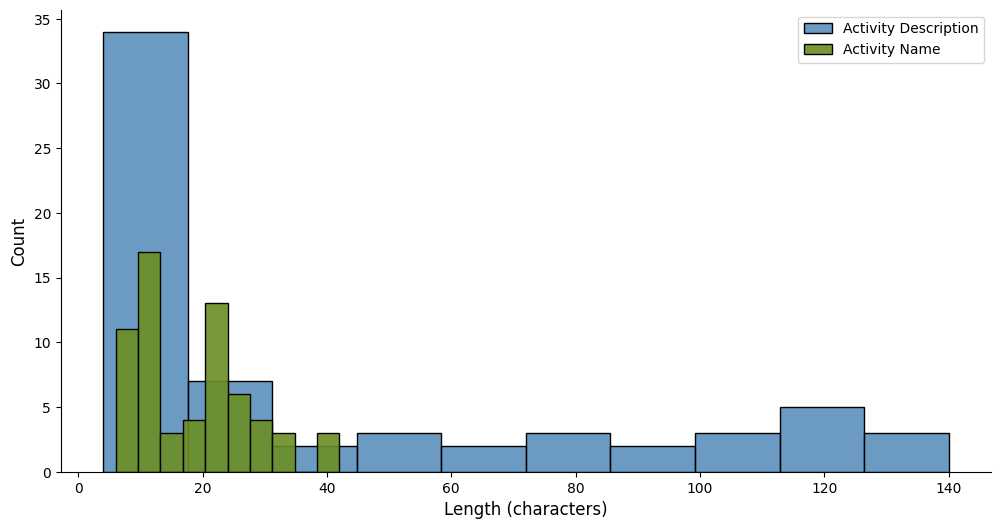

In [16]:
# List of activity names to exclude
exclude_names = [
    "Morning Run", "Stretching", "Night Run", "Afternoon Run",
    "Morning Walk", "Afternoon Walk", "Afternoon Swim", "Lunch Swim",
    "Morning Ride", "Morning Swim", "Evening Swim", "Evening Run"
]

# Filter out empty names/descriptions and excluded names
df_filtered = df[
    (df['activity_name'].astype(str).str.strip() != '') &
    (df['activity_description'].astype(str).str.strip() != '') &
    (~df['activity_name'].isin(exclude_names))
]

# Calculate lengths
df_filtered['name_length'] = df_filtered['activity_name'].astype(str).apply(len)
df_filtered['description_length'] = df_filtered['activity_description'].astype(str).apply(len)

# Zen-inspired color palette
name_color = "#6B8E23"        # Olive green
description_color = "#4682B4" # Steel blue

# Plot distributions
plt.figure(figsize=(12,6))
sns.histplot(df_filtered['description_length'], color=description_color, label='Activity Description', bins=10, alpha=0.8)
sns.histplot(df_filtered['name_length'], color=name_color, label='Activity Name', bins=10, alpha=0.9)
plt.xlabel('Length (characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
sns.despine()
plt.show()

/tmp/ipython-input-2639875906.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


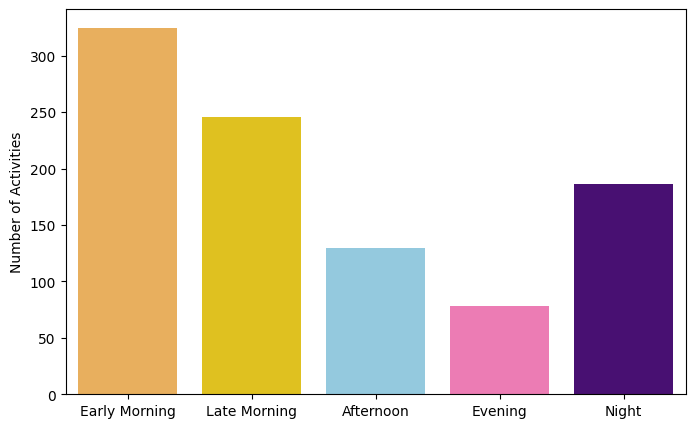

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_parquet("/content/strava_activities_filtered.parquet")

# Convert to datetime
df['activity_start_date_local'] = pd.to_datetime(df['activity_start_date_local'])

# Extract hour
df['hour'] = df['activity_start_date_local'].dt.hour

# Define time of day function
def time_of_day(hour):
    if 3 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function
df['time_of_day'] = df['hour'].apply(time_of_day)


# Define custom colors for each time of day
colors = ['#FFB347',  # Early Morning - orange
          '#FFD700',  # Late Morning - gold
          '#87CEEB',  # Afternoon - sky blue
          '#FF69B4',  # Evening - hot pink
          '#4B0082']  # Night - indigo

plt.figure(figsize=(8,5))
sns.countplot(
    x='time_of_day',
    data=df,
    order=['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night'],
    palette=colors
)
plt.ylabel('Number of Activities')
plt.xlabel('')
plt.show()